### 1) 위치 알아내기

In [1]:
import pandas as pd
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
#이미지에서 글씨를 읽어냄
import pytesseract

In [ ]:
img_ori=cv2.imread("")

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

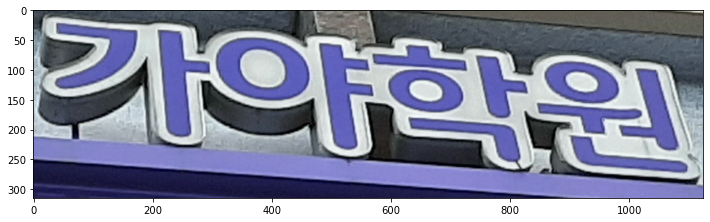

In [10]:
img_ori=cv2.imread("./test/test_00034.png")
height, width, channel=img_ori.shape
plt.figure(figsize=(12,10))
plt.imshow(img_ori, cmap='gray')

- 분석하기 쉽게 gray로 변환

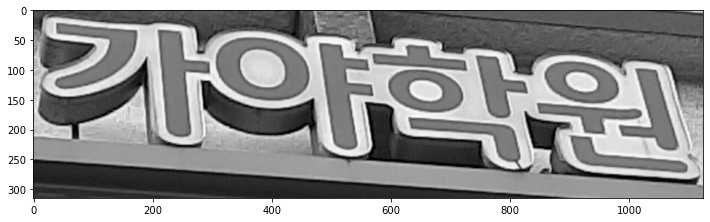

In [11]:
gray=cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,10))
plt.imshow(gray, cmap='gray')

- Adaptive Thresholding

: GaussianBlur(노이즈를 줄임)와 adaptiveThreshold사용(이미지의 Trheshold를 지정->이미지를 구분하기 쉽게)

adaptiveThreshold를 사용하면 Threshold보다 낮은값은 0, 높은값은 250이런식으로 구분해줌

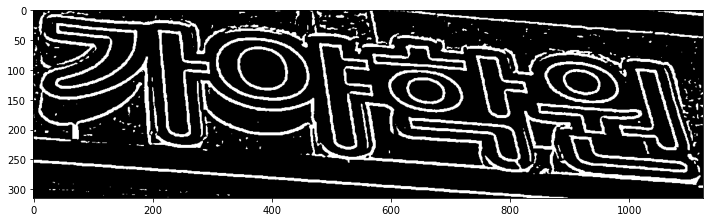

In [17]:
img_blurred=cv2.GaussianBlur(gray, ksize=(5,5), sigmaX=0)

img_thresh=cv2.adaptiveThreshold(img_blurred, maxValue=255.0, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY_INV, blockSize=19, C=9)

plt.figure(figsize=(12,10))
plt.imshow(img_thresh, cmap='gray')

- Find Contours(윤곽선 찾기)

:findContours사용하여 윤곽선 찾기->drawContours사용하여 contour를 그림(-1 : 전체 컨투어를 그림)

In [25]:
_, contours,_ =cv2.findContours(
    img_thresh, 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)

ValueError: not enough values to unpack (expected 3, got 2)

In [29]:
from pytesseract import Output
import pytesseract
import cv2
filename='./test/test_00034.png'
img1=np.array(lmage.open(filename))
text=pytesseract.image_to_string(img1)
print(text)

NameError: name 'lmage' is not defined

### 어떤 글자가 있는지 알아내기